## Noise Comparison

Run the script `noise_comparison_setup.py` before running this notebook.

In [5]:
from typing import Callable, List
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

# set font to Times New Roman
LATEX = False
if LATEX:
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams["font.family"] = "serif"
    mpl.rcParams["font.serif"] = "Times"
else:
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams["font.family"] = "Times New Roman"
    mpl.rcParams["mathtext.fontset"] = "stix"
    
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['savefig.dpi'] = 300

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

mpl.rcParams['axes.titleweight'] = 'bold'

In [6]:
# anisotropic_noise_count.csv is a line-seperated list of python objects
# parse to a nested array 'data'
categories = ['Father Avg', 'Mother Avg', 'Other Avg', 'Father Max', 'Mother Max', 'Other Max']

# pkl files are saved in './noise_comparison/anisotropic_Father Avg.pkl' etc
dfs_anisotropic = {c: pd.read_pickle(f'./noise_comparison/anisotropic_{c}.pkl') for c in categories}
dfs_hybrid = {c: pd.read_pickle(f'./noise_comparison/hybrid_{c}.pkl') for c in categories}

dfs_hybrid[categories[0]].head()

,noise,sqrt_total_var,variances,mean
0,18.407698,17.763031,0.268476,4.000932
1,18.452848,17.477957,0.278667,3.985415
2,18.277654,18.019837,0.257205,3.943930
3,18.254450,17.235275,0.280441,3.970267
4,18.829185,18.076878,0.271242,3.972043


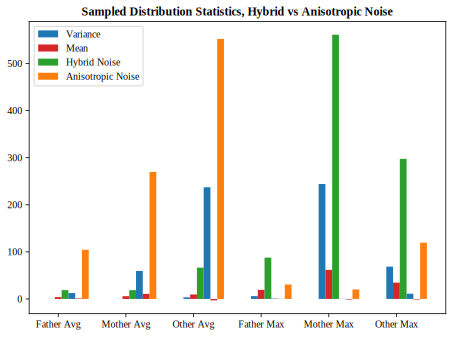

In [7]:
# plot noise avg by category

variances = [np.mean([*dfs_hybrid[c]['variances'], *dfs_anisotropic[c]['variances']]) for c in categories]
means = [np.mean([*dfs_hybrid[c]['mean'], *dfs_anisotropic[c]['mean']]) for c in categories]

anisotropic = {
    'noise': [np.mean(dfs_anisotropic[c]['noise']) for c in categories],
    'variances': [np.mean(dfs_anisotropic[c]['variances']) for c in categories],
    'means': [np.mean(dfs_anisotropic[c]['mean']) for c in categories]
}

hybrid = {
    'noise': [np.mean(dfs_hybrid[c]['noise']) for c in categories],
    'variances': [np.mean(dfs_hybrid[c]['variances']) for c in categories],
    'means': [np.mean(dfs_hybrid[c]['mean']) for c in categories]
}

fig, ax = plt.subplots()

x = np.arange(len(categories))
bar_width = 0.1
xs = [x - (bar_width) + b for b in np.arange(6) * bar_width]

plt.bar(xs[0], hybrid['variances'], bar_width, label='Variance', color='tab:blue')
plt.bar(xs[1], hybrid['means'], bar_width, label='Mean', color='tab:red')
plt.bar(xs[2], hybrid['noise'], bar_width, label='Hybrid Noise', color='tab:green')
plt.bar(xs[3], anisotropic['variances'], bar_width, color='tab:blue')
plt.bar(xs[4], anisotropic['means'], bar_width, color='tab:red')
plt.bar(xs[5], anisotropic['noise'], bar_width, label='Anisotropic Noise', color='tab:orange')

# set x axis labels
plt.xticks(x, categories)


plt.legend(loc='upper left')
plt.title("Sampled Distribution Statistics, Hybrid vs Anisotropic Noise")
plt.tight_layout()
plt.savefig("noise_comparison.png")

plt.show()

<BarContainer object of 1 artists>

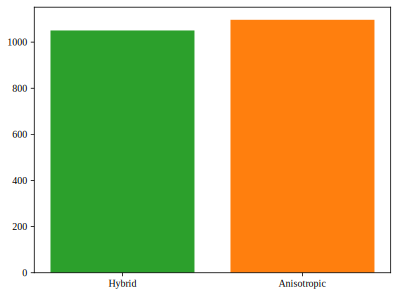

In [8]:
# Stacked bar plot of noise by hybrid/anisotropic
fig, ax = plt.subplots()

hybrid_noise_total = np.sum(hybrid['noise'])
anisotropic_noise_total = np.sum(anisotropic['noise'])

plt.bar("Hybrid", [hybrid_noise_total], label='Hybrid Noise', color='tab:green')
plt.bar("Anisotropic", [anisotropic_noise_total], label='Anisotropic Noise', color='tab:orange')